# Projeto 2 - ECOX14
## Análise do DB da temporada 24-25 da NBA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

/home/lucas/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14,10)

In [3]:
df = pd.read_csv('../data/database_24_25.csv')
print(f"Dataset carregado: {df.shape[0]} jogadores, {df.shape[1]} cols")

print("Primeiras 20 linhas do dataset")
print(df.head(200))

Dataset carregado: 16512 jogadores, 25 cols
Primeiras 20 linhas do dataset
               Player   Tm  Opp Res     MP  FG  FGA    FG%  3P  3PA  ...  DRB  \
0        Jayson Tatum  BOS  NYK   W  30.30  14   18  0.778   8   11  ...    4   
1       Anthony Davis  LAL  MIN   W  37.58  11   23  0.478   1    3  ...   13   
2       Derrick White  BOS  NYK   W  26.63   8   13  0.615   6   10  ...    3   
3        Jrue Holiday  BOS  NYK   W  30.52   7    9  0.778   4    6  ...    2   
4       Miles McBride  NYK  BOS   L  25.85   8   10  0.800   4    5  ...    0   
..                ...  ...  ...  ..    ...  ..  ...    ...  ..  ...  ...  ...   
195    Bruno Fernando  TOR  CLE   L  15.42   3    6  0.500   0    0  ...    5   
196       Tyler Smith  MIL  PHI   W   2.22   2    3  0.667   1    2  ...    0   
197  Patrick Williams  CHI  NOP   L  24.07   2    7  0.286   1    4  ...    1   
198      Jared McCain  PHI  MIL   L   3.87   2    3  0.667   0    1  ...    1   
199   Dennis Schröder  BRK  ATL   

In [4]:
print("Atributos que podem ser analisados (colunas):")
print(df.columns.tolist())

Atributos que podem ser analisados (colunas):
['Player', 'Tm', 'Opp', 'Res', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', 'Data']


In [5]:
print("Informações gerais:")
print(df.info())

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  16512 non-null  object 
 1   Tm      16512 non-null  object 
 2   Opp     16512 non-null  object 
 3   Res     16512 non-null  object 
 4   MP      16512 non-null  float64
 5   FG      16512 non-null  int64  
 6   FGA     16512 non-null  int64  
 7   FG%     16512 non-null  float64
 8   3P      16512 non-null  int64  
 9   3PA     16512 non-null  int64  
 10  3P%     16512 non-null  float64
 11  FT      16512 non-null  int64  
 12  FTA     16512 non-null  int64  
 13  FT%     16512 non-null  float64
 14  ORB     16512 non-null  int64  
 15  DRB     16512 non-null  int64  
 16  TRB     16512 non-null  int64  
 17  AST     16512 non-null  int64  
 18  STL     16512 non-null  int64  
 19  BLK     16512 non-null  int64  
 20  TOV     16512 non-null  int64  
 21  PF      16512 n

In [6]:
print("Estatísticas Descritivas")
print(df.describe())

Estatísticas Descritivas
                 MP            FG           FGA           FG%            3P  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean      22.405259      3.848958      8.271742      0.427527      1.250061   
std       10.896645      3.255864      6.071434      0.254938      1.523651   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       14.427500      1.000000      4.000000      0.286000      0.000000   
50%       23.430000      3.000000      7.000000      0.444000      1.000000   
75%       31.322500      6.000000     12.000000      0.571000      2.000000   
max       50.480000     22.000000     38.000000      1.000000     10.000000   

                3PA           3P%            FT           FTA           FT%  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.477955      0.263719      1.572917      2.016897      0.417737   
std        3.151726      0

# Agregando dados por jogador

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remover colunas que não devem ser agregadas
cols_to_exclude = []
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Dicionário de agregação
agg_dict = {}

# Para estatísticas, calcular média
for col in numeric_cols:
    agg_dict[col] = 'mean'

# Para outras colunas, pegar o primeiro valor (time, etc)
if 'Tm' in df.columns:
    agg_dict['Tm'] = 'first'

# Contar número de jogos
if 'Data' in df.columns:
    agg_dict['Data'] = 'count'
elif 'Res' in df.columns:
    agg_dict['Res'] = 'count'

# Agregar por jogador
df = df.groupby('Player', as_index=False).agg(agg_dict)

# Renomear coluna de contagem para 'Games'
if 'Data' in df.columns:
    df.rename(columns={'Data': 'Games'}, inplace=True)
elif 'Res' in df.columns:
    df.rename(columns={'Res': 'Games'}, inplace=True)

print(f"✓ Dados agregados: {len(df)} jogadores únicos")
print(f"\n📈 Estatísticas de jogos por jogador:")
if 'Games' in df.columns:
    print(df['Games'].describe())

print("\nPrimeiras linhas dos dados agregados:")
print(df.head(10))

✓ Dados agregados: 562 jogadores únicos

📈 Estatísticas de jogos por jogador:
count    562.000000
mean      29.380783
std       15.530690
min        1.000000
25%       17.000000
50%       31.000000
75%       44.000000
max       52.000000
Name: Games, dtype: float64

Primeiras linhas dos dados agregados:
          Player         MP        FG       FGA       FG%        3P       3PA  \
0     A.J. Green  21.997500  2.590909  5.863636  0.426455  2.181818  5.045455   
1    A.J. Lawson   3.757500  1.000000  2.000000  0.666750  0.500000  1.250000   
2     AJ Johnson   6.022222  1.000000  2.777778  0.259333  0.333333  0.777778   
3   Aaron Gordon  26.666000  4.333333  8.500000  0.510900  1.133333  2.800000   
4  Aaron Holiday  11.371944  1.444444  3.444444  0.345556  0.861111  2.305556   
5  Aaron Nesmith  20.949333  2.733333  5.533333  0.478467  1.000000  2.400000   
6  Aaron Wiggins  21.322745  4.019608  8.117647  0.475412  1.333333  3.686275   
7   Adam Flagler   4.278421  0.473684  2.473684

## Para realizar a análise, iremos filtrar os jogadores por uma quantidade mínima de jogos (10 jogos)

In [8]:
MIN_GAMES = 10  # Ajuste conforme necessário

if 'Games' in df.columns:
    df_original = df.copy()
    df = df[df['Games'] >= MIN_GAMES].copy()
    print(f"✓ Filtro aplicado: Mínimo {MIN_GAMES} jogos")
    print(f"✓ Jogadores após filtro: {len(df)} (removidos: {len(df_original) - len(df)})")
else:
    print("⚠ Coluna 'Games' não encontrada. Usando todos os jogadores.")

✓ Filtro aplicado: Mínimo 10 jogos
✓ Jogadores após filtro: 474 (removidos: 88)


## Removendo possíveis valores nulos também

In [9]:
df_before_dropna = df.copy()
df = df.dropna()
print(f"✓ Após remover nulos: {len(df)} jogadores (removidos: {len(df_before_dropna) - len(df)})")

if len(df) < 30:
    print("⚠ Poucos jogadores após filtros. Relaxando critérios...")
    MIN_GAMES = 5
    df = df_original[df_original['Games'] >= MIN_GAMES].copy()
    df = df.dropna()
    print(f"✓ Novo critério: {MIN_GAMES} jogos mínimos")
    print(f"✓ Jogadores: {len(df)}")

print(f"\n✓ Dataset final para análise: {len(df)} jogadores")

✓ Após remover nulos: 474 jogadores (removidos: 0)

✓ Dataset final para análise: 474 jogadores


## Novas features foram adicionadas para realizarmos uma análise mais completa.
- Algumas delas são:
    1. Eficiência de 3pts
    2. Eficiência de lances livres
    3. Playmaking 
    ...

In [10]:
# Eficiência de arremesso de 3 pontos
if '3P%' in df.columns and '3PA' in df.columns:
    df['3PT_Volume_Eff'] = df['3P%'] * df['3PA']
    print("  ✓ 3PT_Volume_Eff (3P% × 3PA)")

if '3P' in df.columns and 'MP' in df.columns:
    df['3PT_per_Min'] = df['3P'] / (df['MP'] + 0.1)
    print("  ✓ 3PT_per_Min (3P / MP)")

# Eficiência de lance livre
if 'FT%' in df.columns and 'FTA' in df.columns:
    df['FT_Volume_Eff'] = df['FT%'] * df['FTA']
    print("  ✓ FT_Volume_Eff (FT% × FTA)")

# Eficiência no garrafão (2 pontos)
if '2P%' in df.columns and '2PA' in df.columns:
    df['2PT_Volume_Eff'] = df['2P%'] * df['2PA']
    print("  ✓ 2PT_Volume_Eff (2P% × 2PA)")

# Playmaking
if 'AST' in df.columns and 'TOV' in df.columns:
    df['AST_TOV_Ratio'] = df['AST'] / (df['TOV'] + 0.1)
    print("  ✓ AST_TOV_Ratio (AST / TOV)")

if 'AST' in df.columns and 'MP' in df.columns:
    df['AST_per_Min'] = df['AST'] / (df['MP'] + 0.1)
    print("  ✓ AST_per_Min (AST / MP)")

# Impacto defensivo
if 'STL' in df.columns and 'BLK' in df.columns:
    df['Defensive_Impact'] = df['STL'] + df['BLK']
    print("  ✓ Defensive_Impact (STL + BLK)")

if 'STL' in df.columns and 'BLK' in df.columns and 'MP' in df.columns:
    df['Defense_per_Min'] = (df['STL'] + df['BLK']) / (df['MP'] + 0.1)
    print("  ✓ Defense_per_Min")

# Rebotes
if 'ORB' in df.columns and 'DRB' in df.columns:
    df['Total_Rebounding'] = df['ORB'] + df['DRB']
    print("  ✓ Total_Rebounding (ORB + DRB)")

if 'TRB' in df.columns and 'MP' in df.columns:
    df['REB_per_Min'] = df['TRB'] / (df['MP'] + 0.1)
    print("  ✓ REB_per_Min (TRB / MP)")

# Eficiência de pontuação
if 'PTS' in df.columns and 'FGA' in df.columns:
    df['PTS_per_FGA'] = df['PTS'] / (df['FGA'] + 0.1)
    print("  ✓ PTS_per_FGA (PTS / FGA)")

if 'PTS' in df.columns and 'MP' in df.columns:
    df['PTS_per_Min'] = df['PTS'] / (df['MP'] + 0.1)
    print("  ✓ PTS_per_Min (PTS / MP)")

# True Shooting % (aproximado)
if 'PTS' in df.columns and 'FGA' in df.columns and 'FTA' in df.columns:
    df['TS%'] = df['PTS'] / (2 * (df['FGA'] + 0.44 * df['FTA']) + 0.1)
    print("  ✓ TS% (True Shooting %)")

# Usage rate (aproximado)
if 'FGA' in df.columns and 'FTA' in df.columns and 'TOV' in df.columns and 'MP' in df.columns:
    df['Usage_Rate'] = (df['FGA'] + 0.44 * df['FTA'] + df['TOV']) / (df['MP'] + 0.1)
    print("  ✓ Usage_Rate")

print(f"\n✓ Total de features criadas: {len([c for c in df.columns if c not in df.columns])}")


  ✓ 3PT_Volume_Eff (3P% × 3PA)
  ✓ 3PT_per_Min (3P / MP)
  ✓ FT_Volume_Eff (FT% × FTA)
  ✓ AST_TOV_Ratio (AST / TOV)
  ✓ AST_per_Min (AST / MP)
  ✓ Defensive_Impact (STL + BLK)
  ✓ Defense_per_Min
  ✓ Total_Rebounding (ORB + DRB)
  ✓ REB_per_Min (TRB / MP)
  ✓ PTS_per_FGA (PTS / FGA)
  ✓ PTS_per_Min (PTS / MP)
  ✓ TS% (True Shooting %)
  ✓ Usage_Rate

✓ Total de features criadas: 0


## Agora realizaremos a clusterização dessas features

In [11]:
# Features principais para identificar especialidades
specialty_features = [
    # Arremessos de 3 pontos
    '3P%', '3PA', '3P', '3PT_Volume_Eff', '3PT_per_Min',
    # Free throws
    'FT%', 'FTA', 'FT', 'FT_Volume_Eff',
    # Arremessos de 2 pontos / Paint
    '2P%', '2PA', '2P', '2PT_Volume_Eff',
    # Playmaking
    'AST', 'TOV', 'AST_TOV_Ratio', 'AST_per_Min',
    # Defesa
    'STL', 'BLK', 'Defensive_Impact', 'Defense_per_Min',
    # Rebotes
    'ORB', 'DRB', 'TRB', 'Total_Rebounding', 'REB_per_Min',
    # Scoring
    'PTS', 'FG%', 'PTS_per_FGA', 'PTS_per_Min', 'TS%',
    # Volume/Usage
    'FGA', 'MP', 'Usage_Rate'
]

available_features = [f for f in specialty_features if f in df.columns]

if len(available_features) < 5:
    print("⚠ Poucas features especializadas encontradas. Usando todas as numéricas.")
    available_features = df.select_dtypes(include=[np.number]).columns.tolist()
    # Remover colunas não relevantes
    available_features = [f for f in available_features if f not in ['Games']]

print(f"\n✓ Features selecionadas para análise ({len(available_features)}):")
for i, feat in enumerate(available_features, 1):
    print(f"  {i:2d}. {feat}")

# Preparar matriz de features
X = df[available_features].values
feature_names = available_features

# Guardar informações dos jogadores
if 'Player' in df.columns:
    player_names = df['Player'].values
else:
    player_names = df.index.values


✓ Features selecionadas para análise (30):
   1. 3P%
   2. 3PA
   3. 3P
   4. 3PT_Volume_Eff
   5. 3PT_per_Min
   6. FT%
   7. FTA
   8. FT
   9. FT_Volume_Eff
  10. AST
  11. TOV
  12. AST_TOV_Ratio
  13. AST_per_Min
  14. STL
  15. BLK
  16. Defensive_Impact
  17. Defense_per_Min
  18. ORB
  19. DRB
  20. TRB
  21. Total_Rebounding
  22. REB_per_Min
  23. PTS
  24. FG%
  25. PTS_per_FGA
  26. PTS_per_Min
  27. TS%
  28. FGA
  29. MP
  30. Usage_Rate


## Normalização dos Dados usando o PCA
- Precisamos dela pois as colunas de dados variam de forma distint, e todas precisam conter o mesmo peso para a clusterização

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"✓ Dados normalizados: {X_scaled.shape}")
print(f"  Média: ~0, Desvio padrão: ~1")

# ============================================================================
# 7. REDUÇÃO DE DIMENSIONALIDADE COM PCA
# ============================================================================

print("\n[7] Aplicando PCA (Principal Component Analysis)...")

# PCA completo para analisar variância
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratio)

print(f"✓ Variância explicada por PC1: {variance_ratio[0]:.2%}")
print(f"✓ Variância explicada por PC2: {variance_ratio[1]:.2%}")
print(f"✓ Variância acumulada (2 PCs): {cumulative_variance[1]:.2%}")
if len(cumulative_variance) > 2:
    print(f"✓ Variância acumulada (3 PCs): {cumulative_variance[2]:.2%}")

# PCA 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# PCA 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)


✓ Dados normalizados: (474, 30)
  Média: ~0, Desvio padrão: ~1

[7] Aplicando PCA (Principal Component Analysis)...
✓ Variância explicada por PC1: 47.30%
✓ Variância explicada por PC2: 19.97%
✓ Variância acumulada (2 PCs): 67.27%
✓ Variância acumulada (3 PCs): 74.53%



[8] Gerando visualizações...
✓ Gráfico salvo: 01_analise_variancia.png


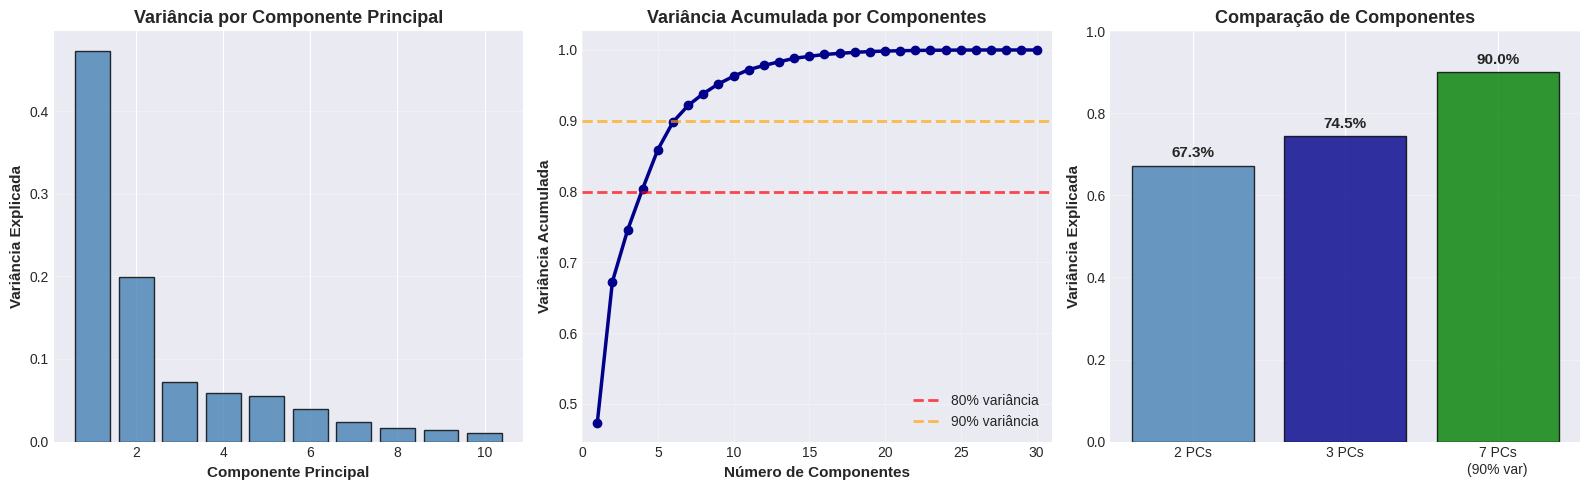

In [13]:
print("\n[8] Gerando visualizações...")

# Figura 1: Análise de Variância
fig1 = plt.figure(figsize=(16, 5))

# Variância por componente (top 10)
ax1 = plt.subplot(1, 3, 1)
n_components_plot = min(10, len(variance_ratio))
ax1.bar(range(1, n_components_plot + 1), variance_ratio[:n_components_plot], 
        color='steelblue', alpha=0.8, edgecolor='black')
ax1.set_xlabel('Componente Principal', fontsize=11, fontweight='bold')
ax1.set_ylabel('Variância Explicada', fontsize=11, fontweight='bold')
ax1.set_title('Variância por Componente Principal', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Variância acumulada
ax2 = plt.subplot(1, 3, 2)
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         'o-', linewidth=2.5, markersize=6, color='darkblue')
ax2.axhline(y=0.80, color='red', linestyle='--', linewidth=2, label='80% variância', alpha=0.7)
ax2.axhline(y=0.90, color='orange', linestyle='--', linewidth=2, label='90% variância', alpha=0.7)
ax2.set_xlabel('Número de Componentes', fontsize=11, fontweight='bold')
ax2.set_ylabel('Variância Acumulada', fontsize=11, fontweight='bold')
ax2.set_title('Variância Acumulada por Componentes', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)
ax2.set_xlim(0, len(cumulative_variance) + 1)

# Componentes necessários para 90% de variância
ax3 = plt.subplot(1, 3, 3)
n_for_90 = np.argmax(cumulative_variance >= 0.90) + 1 if any(cumulative_variance >= 0.90) else len(cumulative_variance)
ax3.bar(['2 PCs', '3 PCs', f'{n_for_90} PCs\n(90% var)'], 
        [cumulative_variance[1], cumulative_variance[2] if len(cumulative_variance) > 2 else 0, 
         min(0.90, cumulative_variance[-1])],
        color=['steelblue', 'darkblue', 'green'], alpha=0.8, edgecolor='black')
ax3.set_ylabel('Variância Explicada', fontsize=11, fontweight='bold')
ax3.set_title('Comparação de Componentes', fontsize=13, fontweight='bold')
ax3.set_ylim([0, 1])
ax3.grid(axis='y', alpha=0.3)

for i, v in enumerate([cumulative_variance[1], 
                       cumulative_variance[2] if len(cumulative_variance) > 2 else 0, 
                       min(0.90, cumulative_variance[-1])]):
    if v > 0:
        ax3.text(i, v + 0.02, f'{v:.1%}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../images/01_analise_variancia.png', dpi=300, bbox_inches='tight')
print("✓ Gráfico salvo: 01_analise_variancia.png")
plt.show()

### Gráfico 1
- Evidencia que a componente principal 1 e 2 são as mais importantes para a análise das features
### Gráfico 2
- Mostra a quantidade ideal de componentes para que eu consiga ter uma boa representação do meus dados. Como vemos ela ultrapassa os 90% em 7 componentes.
### Gráfico 3
- Fornece os números exatos do projeto.

In [14]:
print("Salvando arquivos para os próximos notebooks...")

# 'df' = DataFrame agregado e filtrado
# 'X_scaled' = matriz de dados normalizados
# 'feature_names' = lista com os nomes das colunas usadas
# 'player_names' = array com os nomes dos jogadores

try:
    # Salvar o DataFrame agregado processado (com features)
    df.to_csv('../data/processed_data/dados_processados_agregados.csv', index=False)
    print("✓ dados_processados_agregados.csv salvo.")

    # Salvar os dados normalizados
    np.save('../data/processed_data/X_scaled_agregado.npy', X_scaled)
    print("✓ X_scaled_agregado.npy salvo.")

    # Salvar os nomes das features
    np.save('../data/processed_data/feature_names_agregado.npy', np.array(feature_names))
    print("✓ feature_names_agregado.npy salvo.")

    # Salvar os nomes dos jogadores
    np.save('../data/processed_data/player_names.npy', player_names)
    print("✓ player_names.npy salvo.")
    
    print("\nArquivos gerados com sucesso!")

except NameError as e:
    print(f"\nERRO: Uma das variáveis não foi encontrada. Verifique se 'df', 'X_scaled', 'feature_names' e 'player_names' existem.")
    print(f"Erro original: {e}")
except Exception as e:
    print(f"\nOcorreu um erro inesperado ao salvar os arquivos: {e}")

Salvando arquivos para os próximos notebooks...
✓ dados_processados_agregados.csv salvo.
✓ X_scaled_agregado.npy salvo.
✓ feature_names_agregado.npy salvo.
✓ player_names.npy salvo.

Arquivos gerados com sucesso!



[ANÁLISE DAS COMPONENTES PRINCIPAIS]

TOP 10 FEATURES MAIS IMPORTANTES EM PC1
PTS                            | Peso:  0.9739 | Contrib: 0.9739
FGA                            | Peso:  0.9549 | Contrib: 0.9549
MP                             | Peso:  0.9038 | Contrib: 0.9038
FT%                            | Peso:  0.8984 | Contrib: 0.8984
FT                             | Peso:  0.8964 | Contrib: 0.8964
FTA                            | Peso:  0.8877 | Contrib: 0.8877
TOV                            | Peso:  0.8786 | Contrib: 0.8786
FT_Volume_Eff                  | Peso:  0.8735 | Contrib: 0.8735
PTS_per_Min                    | Peso:  0.8235 | Contrib: 0.8235
AST                            | Peso:  0.7874 | Contrib: 0.7874

TOP 10 FEATURES MAIS IMPORTANTES EM PC2
REB_per_Min                    | Peso:  0.8477 | Contrib: 0.8477
ORB                            | Peso:  0.8022 | Contrib: 0.8022
3PT_per_Min                    | Peso: -0.7496 | Contrib: 0.7496
BLK                            | Pe

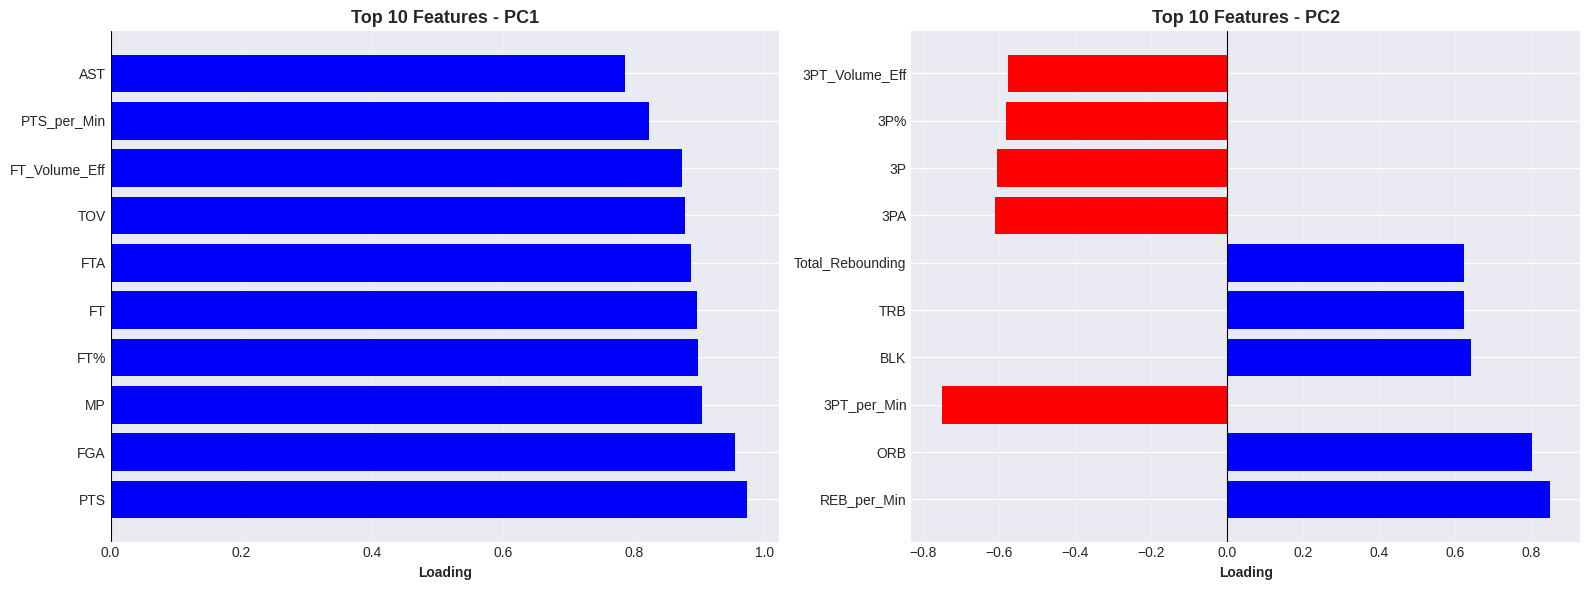

In [15]:
# Analisar as componentes principais
print("\n[ANÁLISE DAS COMPONENTES PRINCIPAIS]\n")

# Obter os loadings (pesos) de cada feature nas componentes
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)

# Criar DataFrame para melhor visualização
loadings_df = pd.DataFrame(
    loadings,
    columns=['PC1', 'PC2'],
    index=feature_names
)

# Adicionar magnitude absoluta para ordenação
loadings_df['PC1_abs'] = np.abs(loadings_df['PC1'])
loadings_df['PC2_abs'] = np.abs(loadings_df['PC2'])

print("=" * 80)
print("TOP 10 FEATURES MAIS IMPORTANTES EM PC1")
print("=" * 80)
top_pc1 = loadings_df.sort_values('PC1_abs', ascending=False).head(10)
for idx, row in top_pc1.iterrows():
    print(f"{idx:30s} | Peso: {row['PC1']:7.4f} | Contrib: {row['PC1_abs']:6.4f}")

print("\n" + "=" * 80)
print("TOP 10 FEATURES MAIS IMPORTANTES EM PC2")
print("=" * 80)
top_pc2 = loadings_df.sort_values('PC2_abs', ascending=False).head(10)
for idx, row in top_pc2.iterrows():
    print(f"{idx:30s} | Peso: {row['PC2']:7.4f} | Contrib: {row['PC2_abs']:6.4f}")

# Visualizar graficamente
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PC1
top10_pc1 = loadings_df.sort_values('PC1_abs', ascending=False).head(10)
axes[0].barh(range(10), top10_pc1['PC1'], color=['red' if x < 0 else 'blue' for x in top10_pc1['PC1']])
axes[0].set_yticks(range(10))
axes[0].set_yticklabels(top10_pc1.index)
axes[0].set_xlabel('Loading', fontweight='bold')
axes[0].set_title('Top 10 Features - PC1', fontsize=13, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[0].grid(axis='x', alpha=0.3)

# PC2
top10_pc2 = loadings_df.sort_values('PC2_abs', ascending=False).head(10)
axes[1].barh(range(10), top10_pc2['PC2'], color=['red' if x < 0 else 'blue' for x in top10_pc2['PC2']])
axes[1].set_yticks(range(10))
axes[1].set_yticklabels(top10_pc2.index)
axes[1].set_xlabel('Loading', fontweight='bold')
axes[1].set_title('Top 10 Features - PC2', fontsize=13, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../images/02_componentes_principais.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico salvo: 02_componentes_principais.png")
plt.show()

## O que podemos inferir das componentes principais 1 e 2?

### PC1 - Jogadores de Perímetro (Armadores, Alas Armadores e Alas)
- Tem como ênfase o impacto ofensivo no geral
- Mede o quanto o jogador é usado no ataque

### PC2 - Jogadores de Garrafão (Pivôs, Alas-Pivôs)
- O quanto os jogadores ajudam na defesa e no garrafão
- Geralmente não são arremessadores, por isso se eles tem bom aproveitamento de perímetro, são excluídos desse cluster.